In [242]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [243]:
hotel = pd.read_csv('hotel_bookings.csv')
hotel[['company' , 'agent']].head(20)

,company,agent
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,304.0
4,NaN,240.0
5,NaN,240.0
6,NaN,NaN
7,NaN,303.0
8,NaN,240.0
9,NaN,15.0


In [244]:
hotel.shape

(119390, 32)

In [245]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [246]:
hotel['deposit_type'].astype('category')

0         No Deposit
1         No Deposit
2         No Deposit
3         No Deposit
4         No Deposit
             ...    
119385    No Deposit
119386    No Deposit
119387    No Deposit
119388    No Deposit
119389    No Deposit
Name: deposit_type, Length: 119390, dtype: category
Categories (3, object): ['No Deposit', 'Non Refund', 'Refundable']

In [247]:
# is_repeated_guest , is_canceled
hotel['is_repeated_guest'].unique()

array([0, 1], dtype=int64)

In [248]:
threhold = len(hotel)*0.05
col_na = hotel.columns[hotel.isna().sum() <= threhold]
hotel.dropna(subset = col_na , inplace=True)


In [249]:
hotel.columns[hotel.isna().sum() > 0]

Index(['agent', 'company'], dtype='object')

In [250]:
hotel.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16004
company         

In [251]:

# sns.barplot(data = hotel , x='hotel' , y='children')
# plt.show()



In [252]:
# hotel[hotel['agent'].isna()]['company'].isna().sum()

hotel['agent'] = hotel['agent'].replace(np.nan , "didn't book through an agent")
hotel['agent'].isna().sum()
hotel['agent'].dtype
# hotel['agent'].value_counts()

dtype('O')

In [253]:
hotel['company'] = hotel['company'].replace(np.nan , "didn't book through a company")
hotel['company'].isna().sum()
hotel['company'].value_counts()


company
didn't book through a company    112275
40.0                                927
223.0                               784
67.0                                267
45.0                                250
                                  ...  
10.0                                  1
100.0                                 1
96.0                                  1
76.0                                  1
376.0                                 1
Name: count, Length: 350, dtype: int64

In [254]:
# hotel.describe()
yn_dict = {0 : 'No' , 1: 'Yes'}
col_to_change = ["is_repeated_guest" , "is_canceled"]
hotel['is_canceled'] = hotel['is_canceled'].map(yn_dict)
hotel['is_canceled'].value_counts()
hotel['is_repeated_guest'] = hotel['is_repeated_guest'].map(yn_dict)
hotel['is_repeated_guest'].value_counts()

is_repeated_guest
No     115092
Yes      3806
Name: count, dtype: int64

C:\Users\IMEX\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\IMEX\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\IMEX\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\IMEX\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

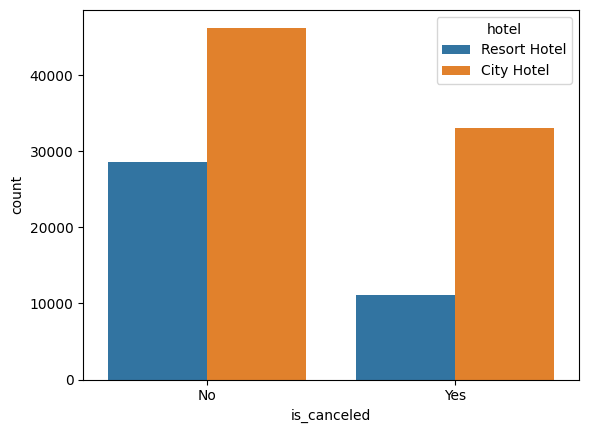

In [255]:
sns.countplot(data = hotel , x='is_canceled' , hue='hotel')
plt.show()

C:\Users\IMEX\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\IMEX\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\IMEX\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\IMEX\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

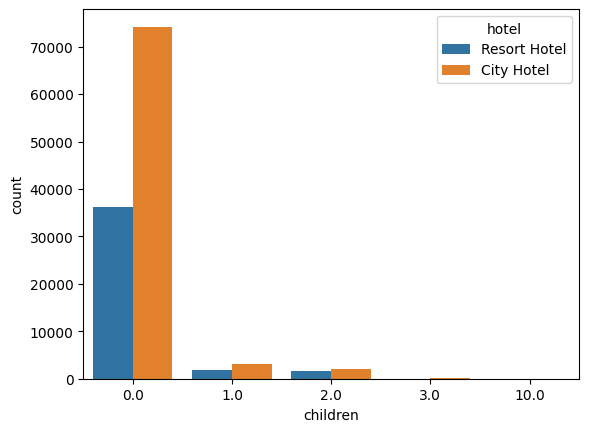

In [256]:
hotel['children'].value_counts()
sns.countplot(data = hotel , x='children' , hue='hotel')
plt.show()

C:\Users\IMEX\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\IMEX\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\IMEX\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\IMEX\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

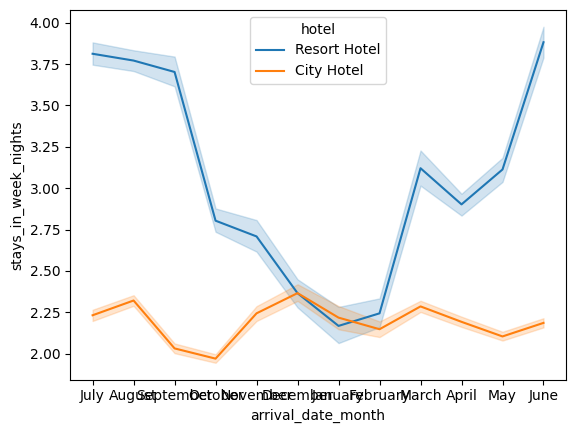

In [257]:
sns.lineplot(data=hotel, x="arrival_date_month" , y="stays_in_week_nights"  , hue='hotel' )
plt.show()


C:\Users\IMEX\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\IMEX\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\IMEX\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\IMEX\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

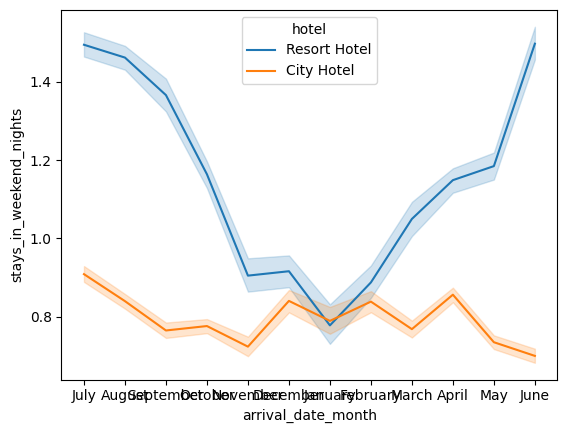

In [258]:
sns.lineplot(data=hotel, x="arrival_date_month" , y="stays_in_weekend_nights"  , hue='hotel')
plt.show()

In [259]:
#outliers
hotel['children'].describe()
seventy_fifth = hotel['children'].quantile(0.75)
twenty_fifth = hotel['children'].quantile(0.25)
med = hotel['children'].median()
iqr = seventy_fifth - twenty_fifth
upper = seventy_fifth + (1.5 * iqr)
lower = twenty_fifth - (1.5 * iqr)
print(upper , lower)
hotel['children'].value_counts()

0.0 0.0


children
0.0     110319
1.0       4852
2.0       3650
3.0         76
10.0         1
Name: count, dtype: int64

In [271]:
group2 = hotel[(hotel["children"] < lower) | (hotel["children"] > upper)]
# hotel.drop(hotel[group2== 10].index, inplace = True)
hotel.drop(group2[group2['children'] == 10].index, inplace =True)
hotel[hotel['children'] == 10]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [260]:

g = hotel[hotel['adults'] == 0]
hotel.drop(g.index, inplace = True)
# g.shape
hotel.shape

(118505, 32)

In [285]:
g3 = hotel[(hotel['babies'] == 9 )| (hotel['babies'] == 10)]
hotel.drop(g3.index , inplace= True)
hotel['babies'].value_counts()

babies
0    117590
1       895
2        14
Name: count, dtype: int64